In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

trainingSet = pd.read_csv("/content/gdrive/MyDrive/Notes/Shivangi/CS 506 (TDS)/Midterm/data/X_train.csv")

### Exploratory Data Analysis

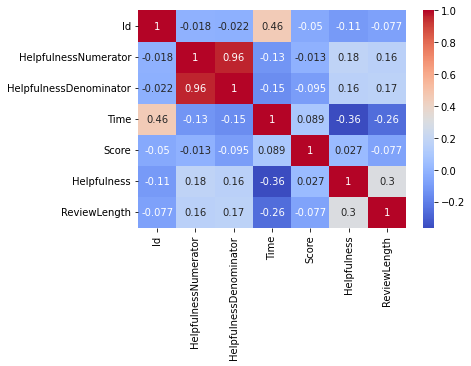

In [4]:
# Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

corr = trainingSet.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Plotted the correlation matrix on the entire dataset without any preprocessing to see if there are any correlationin the raw data. We can see that 'Time' and 'Helpfullness' do have some correlation with the 'Score'

In [5]:
# Taking a sample for faster processing

trainingSet.fillna(value='', inplace=True)
sample_data_some = trainingSet.iloc[:45000]
sample_data_some = sample_data_some.sample(frac = 1, random_state = 0)
sample_data_some = sample_data_some.reset_index(drop = True)

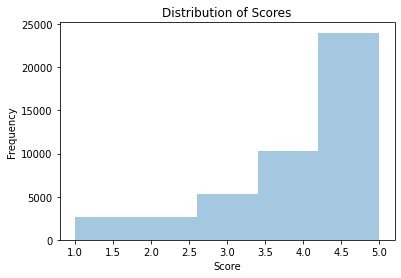

In [9]:
# Creating a distribution plot of the Score variable

sns.distplot(sample_data_some['Score'], kde=False, bins=5)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

I plotted this graph to see if there are any outliers and to understand the distribution of 'Score'. From the above graph, we can see that our data is very skewed towards the ranking 5.

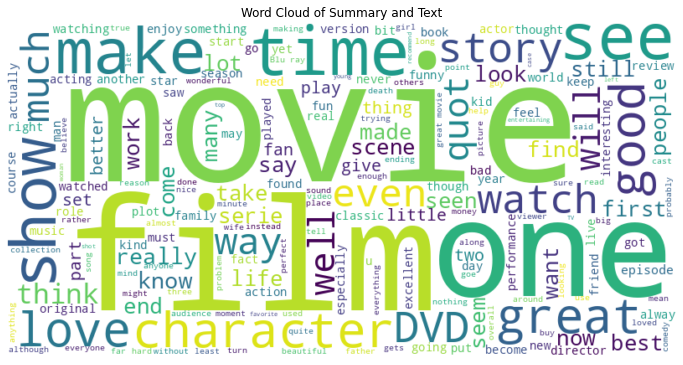

In [10]:
# word cloud of the combined text

from wordcloud import WordCloud

text = ' '.join(sample_data_some['Summary']) + ' ' + ' '.join(sample_data_some['Text'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Summary and Text')
plt.show()

This plot simply shows that the most used words in the reviews is 'movies', 'film', 'one' stc. This graph in itself is not very inuitive but it made me think about the length of words used in text or summary.

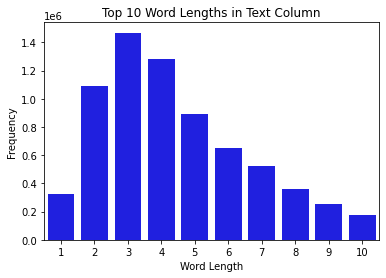

In [11]:
# plotting the top 10 word lengths in text

words = sample_data_some['Text'].str.split()
word_lengths = [len(word) for sublist in words for word in sublist]
word_length_counts = pd.Series(word_lengths).value_counts()

# Take the top 10 word lengths
top_10_word_lengths = word_length_counts.head(10)

sns.barplot(x=top_10_word_lengths.index, y=top_10_word_lengths.values, color='b')
plt.title('Top 10 Word Lengths in Text Column')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

This graph validates the previous graph. So the most used word length is 3. 

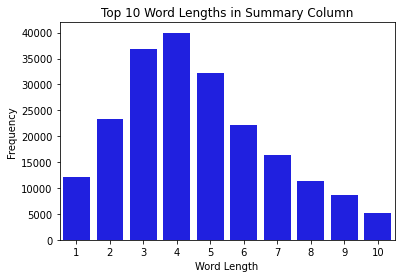

In [12]:
# plotting the top 10 word lengths in summary

words = sample_data_some['Summary'].str.split()
word_lengths = [len(word) for sublist in words for word in sublist]
word_length_counts = pd.Series(word_lengths).value_counts()

# Take the top 10 word lengths
top_10_word_lengths = word_length_counts.head(10)

sns.barplot(x=top_10_word_lengths.index, y=top_10_word_lengths.values, color='b')
plt.title('Top 10 Word Lengths in Summary Column')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

From the above two graphs, I can conclude that words with shorter length has a huge weightage and should not be removed while doing tfidf vertorization

### Feature Extraction/Engineering

In [6]:
# setiment analysis using nltk

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in sample_data_some['Text']]
sample_data_some['Text_Sentiment'] = polarity
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in sample_data_some['Summary']]
sample_data_some['Summary_Sentiment'] = polarity

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [7]:
# Encdoing product and user Ids to look for correlations

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(sample_data_some['ProductId'].values)
sample_data_some['Encoded_PId'] = le.transform(sample_data_some['ProductId'].values)

le.fit(sample_data_some['UserId'].values)
sample_data_some['Encoded_UId'] = le.transform(sample_data_some['UserId'].values)

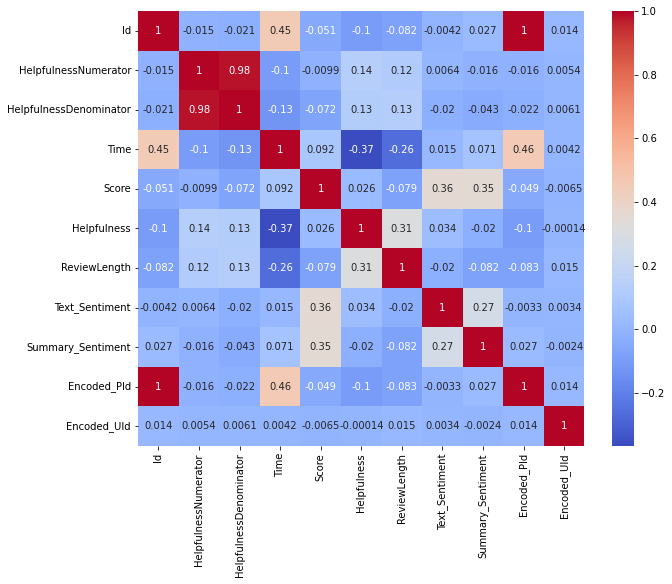

In [8]:
# Plotting correlation Matrix again

corr = sample_data_some.corr()
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

From the above plot, we can see that 'Text_Sentiment' and 'Summary_Sentiment' are correlated with 'Score' by a huge factor

In [14]:
# Calculating the tfidf for text and summary columns

from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(analyzer='word', ngram_range = (1,3))
character_vectorizer = TfidfVectorizer(analyzer='char', ngram_range = (2,4))

text_vector = word_vectorizer.fit_transform(sample_data_some['Text'])
summ_vector = character_vectorizer.fit_transform(sample_data_some['Summary'])